# Student Performance In Exams Analysis EDA

### Life-Cycle of Machine Learning Project

1. Understanding the problem statement
2. Data Collection
3. Data Checks to perform
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model Training
7. Choose best model

## 1) Problem Statement

This project understands how the student's performance (test scores) is affected by the factors of Gender, Race/ethnicity, Parental level of education, Lunch, Test preparation course

## 2) Data Collection

1. Dataset Source:- https://www.kaggle.com/code/spscientist/student-performance-in-exams
2. The dataset consists of 8 columns and 1000 rows

### 2.1 Load Data and Import Required Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Print top 5 records as sample

In [20]:
df = pd.read_csv("data\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3) Data Checks to Perform

### 3.1. Check Missing Values

In [21]:
df.isnull().sum()       #No missing value

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 3.2. Check Duplicates

In [22]:
print(df.duplicated().sum())        #No duplicates

0


### 3.3. Check data type

In [23]:
df.info()           # 5 categorical and 3 numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4. Check unique values of each column

In [24]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [25]:
for col in df.columns:
    print(f"Unique values of column '{col}':\n")
    print(df[col].unique())
    print('\n','-'*50,'\n')

Unique values of column 'gender':

['female' 'male']

 -------------------------------------------------- 

Unique values of column 'race/ethnicity':

['group B' 'group C' 'group A' 'group D' 'group E']

 -------------------------------------------------- 

Unique values of column 'parental level of education':

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

 -------------------------------------------------- 

Unique values of column 'lunch':

['standard' 'free/reduced']

 -------------------------------------------------- 

Unique values of column 'test preparation course':

['none' 'completed']

 -------------------------------------------------- 

Unique values of column 'math score':

[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  

### 3.5. Check statistics of dataset

In [26]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Observations:-

1. From above description of numerical features, all means and all std. deviations are close to each other.
2. The maximum score for each column is 100.0

## 4) Feature Engineering

### 4.1. Add columns for 'Total Score' and 'Average Score'

In [27]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 4.2. Add performance label based on scores

In [28]:
def get_performance_label(score):
    if score >= 90:
        return 'Excellent'
    elif score >= 75:
        return 'Good'   
    elif score >= 60:
        return 'Average'
    else:
        return 'Poor'

df['performance level'] = df['average'].apply(get_performance_label)

In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average,performance level
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Average
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Good
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Excellent
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Poor
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Good


## 5) Exploring data

### 3.6. Identifying categorical and numerical features

In [30]:
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']

print("Categorical features are: ",categorical_features)
print("Numerical features are: ",numerical_features)

Categorical features are:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'performance level']
Numerical features are:  ['math score', 'reading score', 'writing score', 'total score', 'average']


### 5.1. Finding out proportion of categories in each categorical column

In [31]:
print("                                 Proportion of categories in categorical features:-")
for col in categorical_features:
    print('\n')
    print(df[col].value_counts())
    print('\n','-'*50)

                                 Proportion of categories in categorical features:-


gender
female    518
male      482
Name: count, dtype: int64

 --------------------------------------------------


race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

 --------------------------------------------------


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

 --------------------------------------------------


lunch
standard        645
free/reduced    355
Name: count, dtype: int64

 --------------------------------------------------


test preparation course
none         642
completed    358
Name: count, dtype: int64

 --------------------------------------------------


performance level
Average      391
Poor         285
Good         272
Excellent     52
Name: coun

### 5.2. Finding out distribution in each numerical column

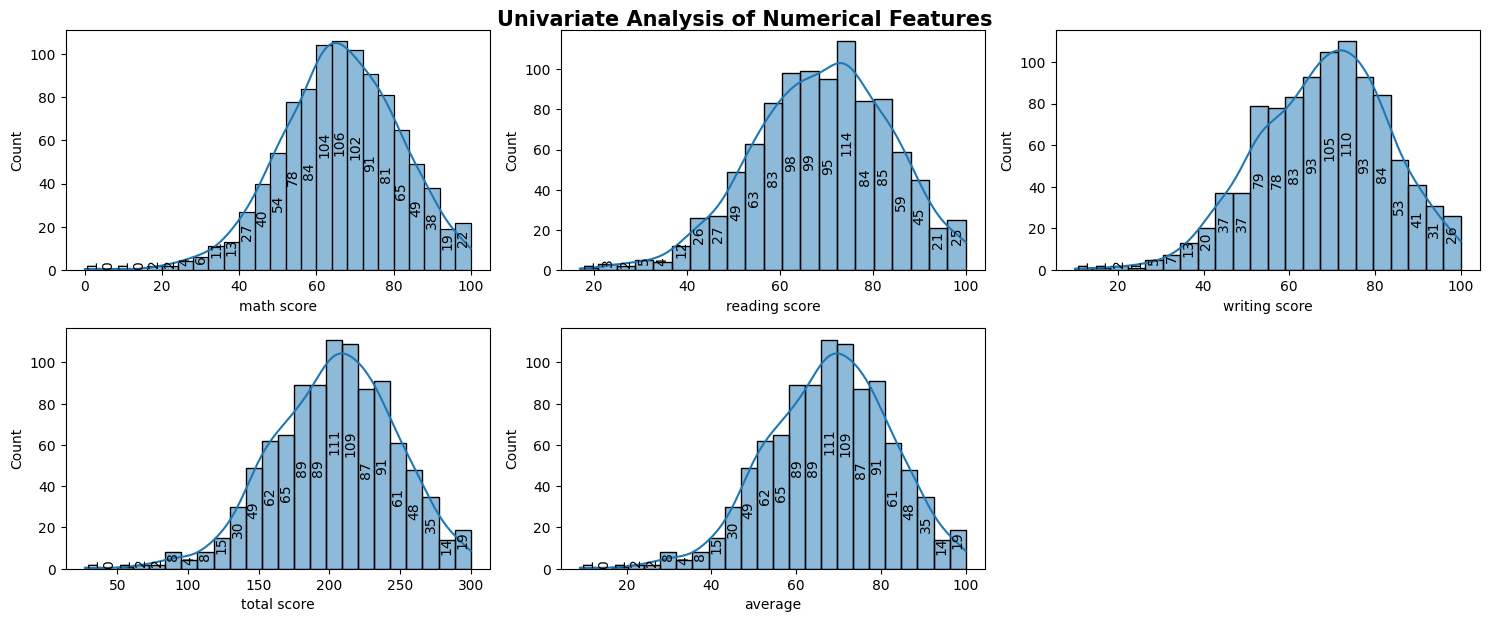

In [32]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=15,fontweight='bold')

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)

    ax = sns.histplot(df[numerical_features[i]],kde=True)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height / 2),
                    ha='center', va='bottom', rotation = 90, fontsize=10)

    plt.xlabel(numerical_features[i])
    plt.tight_layout()

### 5.3 Find out no. of students who scored full marks in each subject

In [43]:
math_excel = df[df['math score']==100]['average'].count()
print("No. of students who has full score in math: ",math_excel)

reading_excel = df[df['reading score']==100]['average'].count()
print("No. of students who has full score in reading: ",reading_excel)

writing_excel = df[df['writing score']==100]['average'].count()
print("No. of students who has full score in writing: ",writing_excel)

No. of students who has full score in math:  7
No. of students who has full score in reading:  17
No. of students who has full score in writing:  14


In [49]:
perfect_score = df[df['total score']==300]['average'].count()
print("No. of students who secured perfect score: ",perfect_score)

No. of students who secured perfect score:  3


#### Observations:-

1. No. of students who scored full scores in Math, Reading and Writing are :- 7, 17, 14 respectively
2. Most of the students scored in range 60-80 for each subject
3. 3 students scored perfect total score of 300.
4. Large amount of total scores are around 200 and same for average score in range 60-80. 

### 5.4 Find out average scores of each subject

In [33]:
math_avg = np.mean(df['math score'])
reading_avg = np.mean(df['reading score'])
writing_avg = np.mean(df['writing score'])

print("Average math score: ",math_avg)
print("Average reading score: ",reading_avg)
print("Average writing score: ",writing_avg)

Average math score:  66.089
Average reading score:  69.169
Average writing score:  68.054


### 5.5. Finding out students who performed fairly and poorly based on average score in each subject 

In [37]:
math_fair = df[df['math score'] >= math_avg]['average'].count()
math_poor = df[df['math score'] < math_avg]['average'].count()

reading_fair = df[df['reading score'] >= reading_avg]['average'].count()
reading_poor = df[df['reading score'] < reading_avg]['average'].count()

writing_fair = df[df['writing score'] >= writing_avg]['average'].count()
writing_poor = df[df['writing score'] < writing_avg]['average'].count()

print(f"Math: Number of students performed above average = {math_fair} and Number of students performed below average = {math_poor}")
print(f"Reading: Number of students performed above average = {reading_fair} and Number of students performed below average = {reading_poor}")
print(f"Writing: Number of students performed above average = {writing_fair} and Number of students performed below average = {writing_poor}")

Math: Number of students performed above average = 493 and Number of students performed below average = 507
Reading: Number of students performed above average = 513 and Number of students performed below average = 487
Writing: Number of students performed above average = 512 and Number of students performed below average = 488


### 5.6 Find out top 10 performing students

In [39]:
top_10 = df.sort_values('total score', ascending=False).head(10)
top_10

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average,performance level
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.000000,Excellent
962,female,group E,associate's degree,standard,none,100,100,100,300,100.000000,Excellent
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000,Excellent
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667,Excellent
712,female,group D,some college,standard,none,98,100,99,297,99.000000,Excellent
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000,Excellent
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667,Excellent
625,male,group D,some college,standard,completed,100,97,99,296,98.666667,Excellent
685,female,group E,master's degree,standard,completed,94,99,100,293,97.666667,Excellent
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,293,97.666667,Excellent


1. Out of 10, 8 female students are in Top 10 list of highest scorers.
2. 90% of top 10 students belong to either group C and D.
3. Most of them has standard lunch and test preparation course completed

### 5.7 Does gender affect student performance?

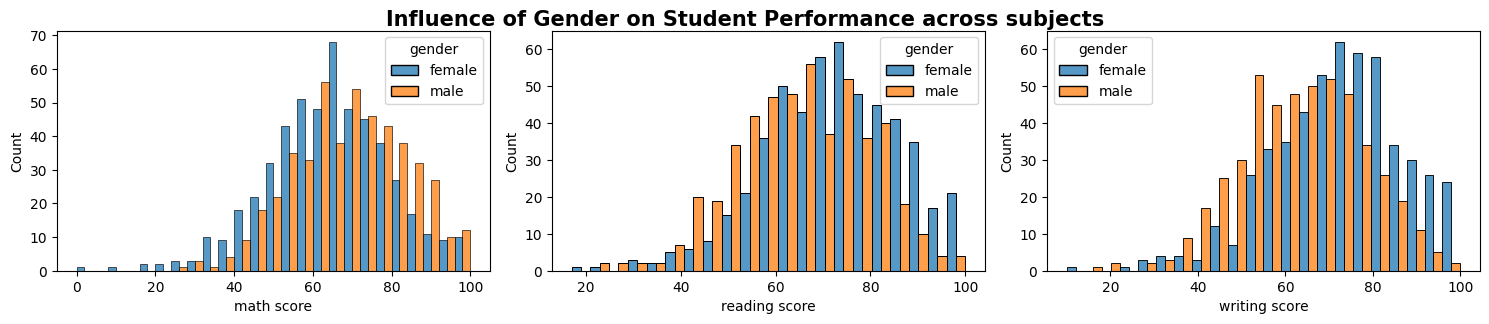

In [64]:
plt.figure(figsize=(15,15))
plt.suptitle("Influence of Gender on Student Performance across subjects",fontsize=15,fontweight='bold')

subjects = ['math score', 'reading score', 'writing score']

for i in range(0,len(subjects)):
    plt.subplot(5,3,i+1)

    sns.histplot(data = df, x = df[subjects[i]], hue = df['gender'], multiple='dodge')

    plt.xlabel(subjects[i])
    plt.tight_layout()

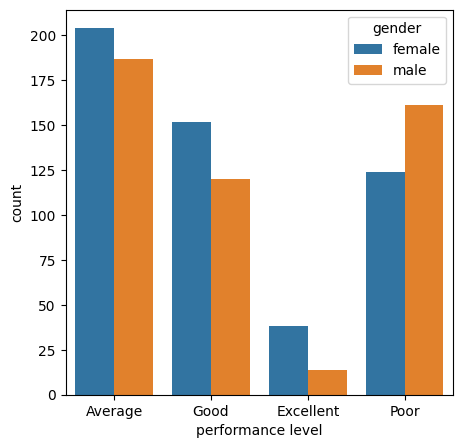

In [72]:
## Based on Overall Performance Levels

plt.figure(figsize=(5,5))
sns.countplot(data=df, x=df['performance level'], hue=df['gender'])
plt.show()

#### Observations:-

1. Female students tend to perform better than male students.
2. In Reading and Writing subjects, females are usually scoring higher marks than males but the case is opposite in Math subject.

### 5.8. Correlation between parental education level and student scores

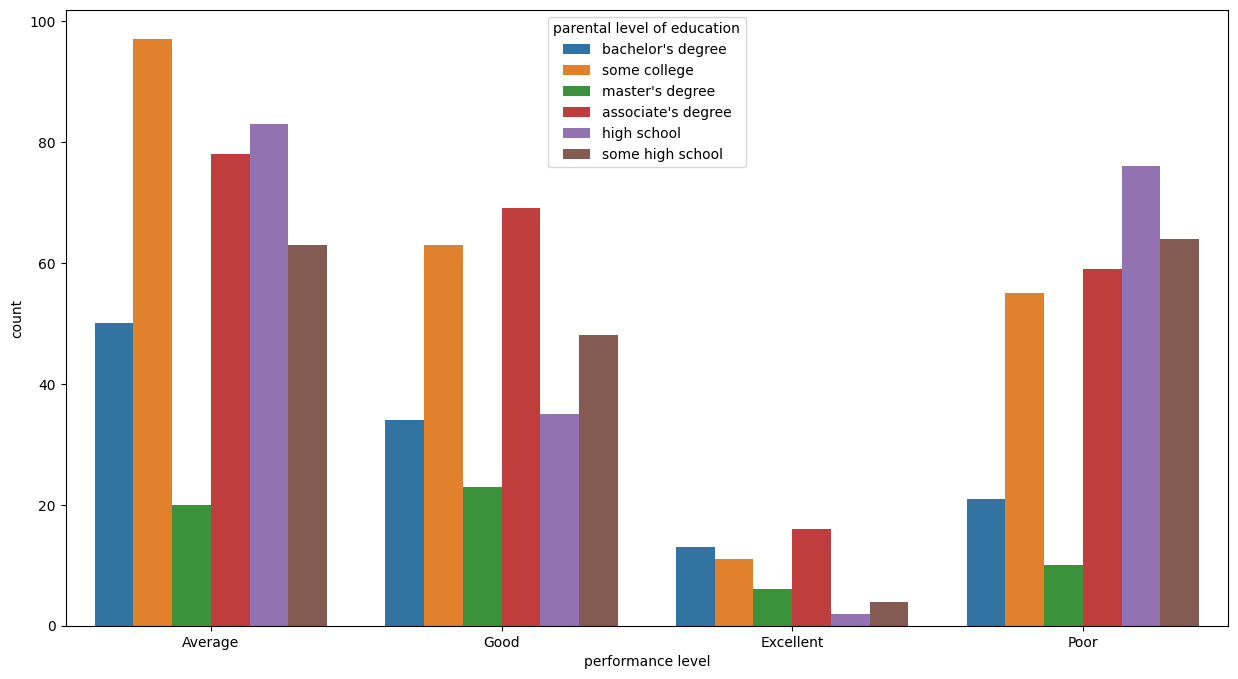

In [74]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, hue=df['parental level of education'], x=df['performance level'])
plt.show()

### 5.9. Do students who complete test preparation courses score higher?

In [77]:
test_prep_none = df[df['test preparation course']=='none']
test_prep_none_count = len(test_prep_none)
test_prep_none_avg = np.mean(test_prep_none['average'])

test_prep_completed = df[df['test preparation course']=='completed']
test_prep_completed_count = len(test_prep_completed)
test_prep_completed_avg = np.mean(test_prep_completed['average'])

print(f"No. of students who didn't complete their test prep course: {test_prep_none_count}. Their average marks: {test_prep_none_avg}")
print(f"No. of students who completed their test prep course: {test_prep_completed_count}. Their average marks: {test_prep_completed_avg}")

No. of students who didn't complete their test prep course: 642. Their average marks: 65.03894080996885
No. of students who completed their test prep course: 358. Their average marks: 72.66945996275605


Thus, Students who completed their test prep courses scored more than those who didn't, on average.

### 5.10. Relationship between lunch type (standard vs. free/reduced) and performance

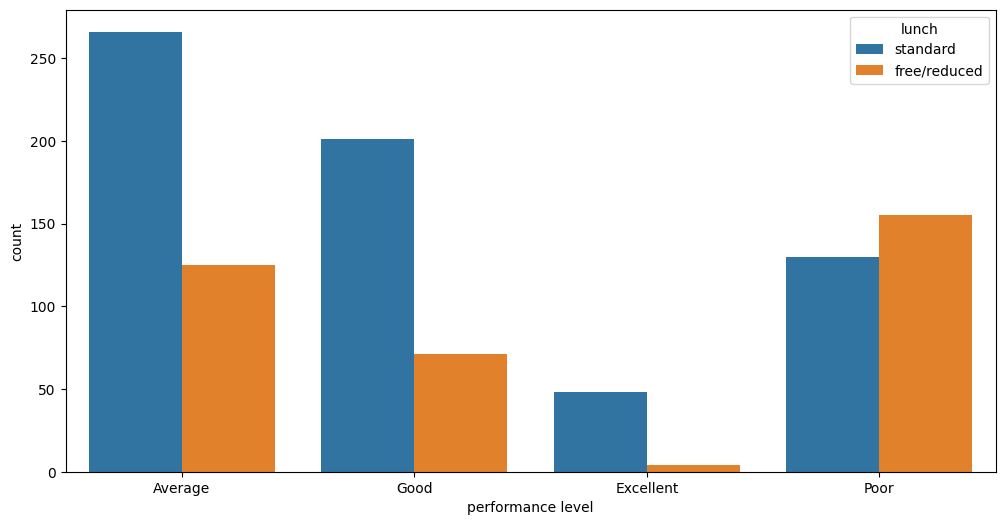

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, hue=df['lunch'], x=df['performance level'])
plt.show()

In [93]:
lunch_std_avg = np.mean(df[df['lunch']=='standard']['average'])
lunch_fr_avg = np.mean(df[df['lunch']=='free/reduced']['average'])

print("Average score of students having standard lunch type: ", lunch_std_avg)
print("Average score of students having free/reduced lunch type: ", lunch_fr_avg)

Average score of students having standard lunch type:  70.83720930232558
Average score of students having free/reduced lunch type:  62.199061032863845


Students with standard lunch type has dominantly greater performance than students which free/reduced lunch type.

### 5.11. Differences in performance across different ethnic groups or races

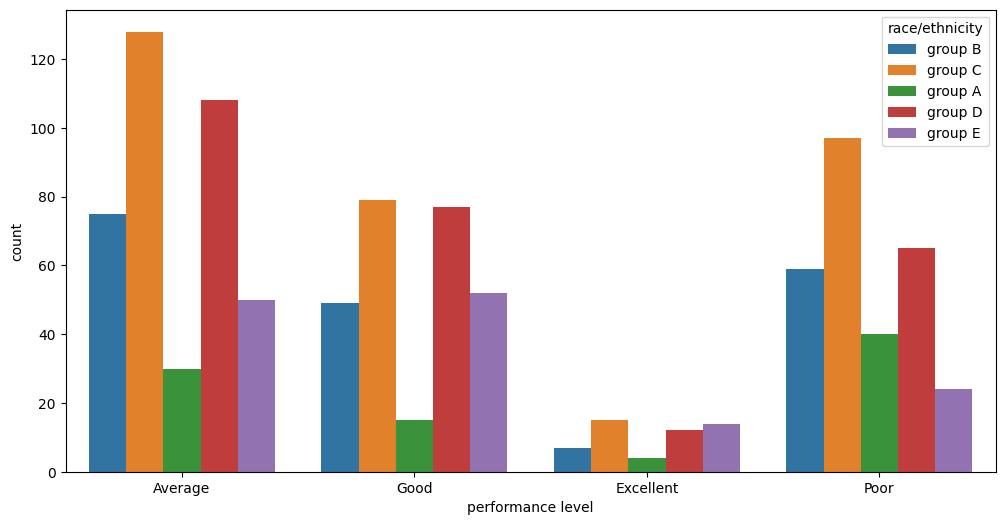

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, hue=df['race/ethnicity'], x=df['performance level'])
plt.show()

In [84]:
score_A = np.mean(df[df['race/ethnicity']=='group A']['average'])
score_B = np.mean(df[df['race/ethnicity']=='group B']['average'])
score_C = np.mean(df[df['race/ethnicity']=='group C']['average'])
score_D = np.mean(df[df['race/ethnicity']=='group D']['average'])
score_E = np.mean(df[df['race/ethnicity']=='group E']['average'])

print("Average score of students from group A: ", score_A)
print("Average score of students from group B: ", score_B)
print("Average score of students from group C: ", score_C)
print("Average score of students from group D: ", score_D)
print("Average score of students from group E: ", score_E)

Average score of students from group A:  62.992509363295895
Average score of students from group B:  65.46842105263158
Average score of students from group C:  67.13166144200628
Average score of students from group D:  69.1793893129771
Average score of students from group E:  72.75238095238095


#### Observations
1. Although, there are slight differences in scores due to the influence of races/ethinicity, students belonging to groups D and E are performing better in comparison to general average score of students
2. Many students from group C and D are there in the dataset, thus not providing comprehensive view on student performance through visualization (due to imbalance)

### 5.12. Correlation In Numerical Features

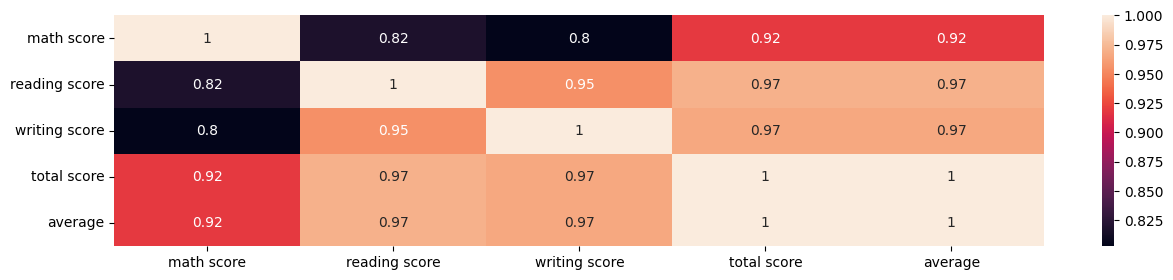

In [90]:
corr = df[numerical_features].corr()
plt.figure(figsize=(15,3))
sns.heatmap(corr, annot=True)
plt.show()

### 5.13. Multivariate Analysis

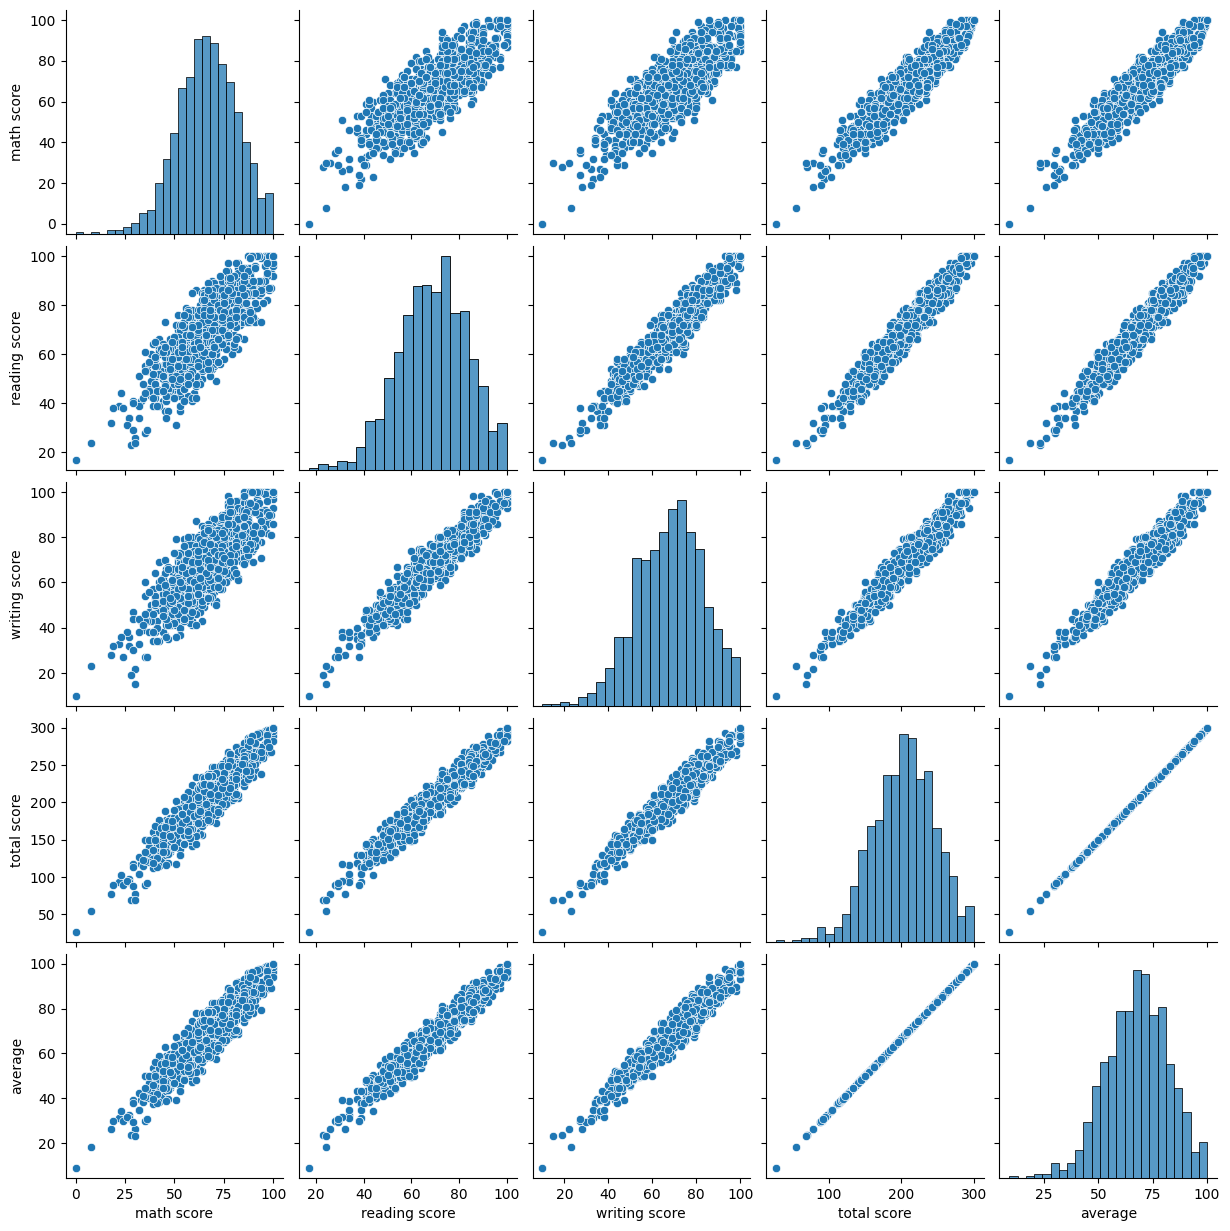

In [92]:
sns.pairplot(df)
plt.show()